# Clustering

# let's start by creating two distinct datasets with 2 and 5 clusters respectively

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

X2,y2 = make_blobs(n_samples = 5000, n_features = 2, centers = 2)
X5,y5 = make_blobs(n_samples = 5000, n_features = 2, centers = 5)

# Now, we are going to run the k-means algorith with k= 5 and plot the given clusters

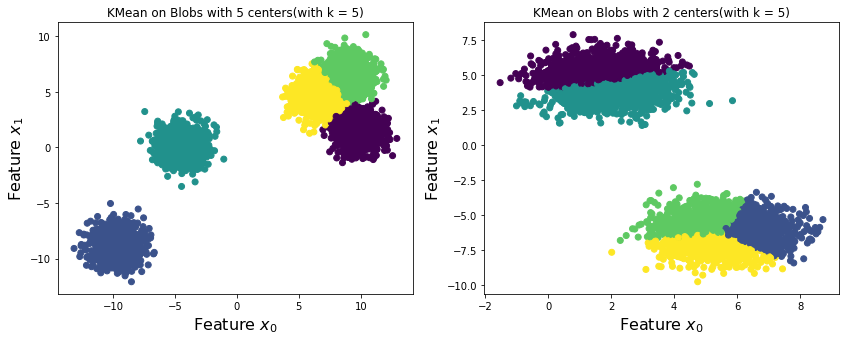

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km5 = KMeans(n_clusters = 5)
km5.fit(X5)
y5_pred = km5.predict(X5)

km2 = KMeans(n_clusters = 5)
km2.fit(X2)
y2_pred = km2.predict(X2)

plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
plt.scatter(X5[:,0],X5[:,1],c = y5_pred)
plt.xlabel('Feature $x_0$', size = 16)
plt.ylabel('Feature $x_1$', size = 16)
plt.title('KMean on Blobs with 5 centers(with k = 5)')


plt.subplot(1,2,2)
plt.scatter(X2[:,0],X2[:,1],c = y2_pred)
plt.xlabel('Feature $x_0$', size = 16)
plt.ylabel('Feature $x_1$', size = 16)
plt.title('KMean on Blobs with 2 centers(with k = 5)')

plt.show()

# Next, we are going to compute their Sum of Square error, and draw their elbow curve to see which number of cluster has the best SSE.

In [3]:
def SSE(km,X,y):
    unique = list(set(y))
    cent = km.cluster_centers_
    sse = 0
    for i in unique:
        idx = (y == i)
        sse += np.sum((X[idx][:,0] - cent[i][0])**2 +  (X[idx][:,1] - cent[i][1])**2)
    return (round(sse,2))  

sse5 = SSE(km5,X5,y5_pred)
sse2 = SSE(km2,X2,y2_pred)

print(f' Sum of squared erros for the blobs with 2 centers : {sse2} \n Sum of squared erros for the blobs with 5 centers : {sse5}')

 Sum of squared erros for the blobs with 2 centers : 5501.56 
 Sum of squared erros for the blobs with 5 centers : 9550.61


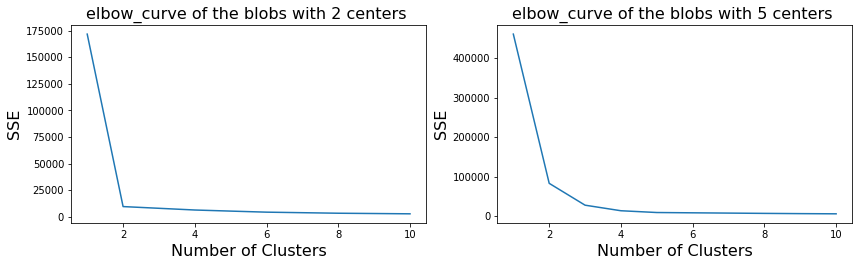

In [4]:
from sklearn.cluster import KMeans

def elbow_val(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters = i)
        km.fit(X)
        y_pred = km.predict(X)
        sse.append(SSE(km,X,y_pred))
    return sse

def elbow_curve(arr_X, arr_title):

    nbr_ = len(arr_X)
    plt.figure(figsize = (7* nbr_, 4* nbr_ ))
    for i in range(nbr_):
        X = arr_X[i]
        title = arr_title[i]
        sse = elbow_val(X)
        if nbr_ ==1:
            plt.plot(range(1,11), sse)
            
        else:
            plt.subplot(int(nbr_/2) +1 ,2,i+1)
            plt.plot(range(1,11), sse)

        plt.title(title, size = 16)
        plt.ylabel('SSE',size = 16)
        plt.xticks(range(2,11,2))
        plt.xlabel('Number of Clusters', size = 16)
    plt.show()
        
elbow_curve([X2,X5], ['elbow_curve of the blobs with 2 centers ','elbow_curve of the blobs with 5 centers '])

# Classification 

# let's start by creating a dataset using the make moons function

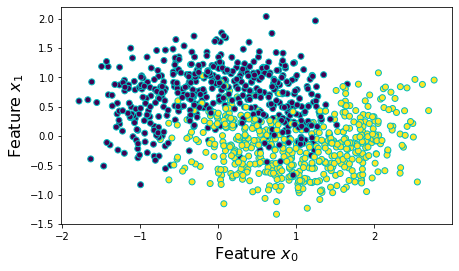

In [5]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 1000,noise = .35)

plt.figure(figsize = (7,4))
plt.scatter(X[:,0],X[:,1],c= y, edgecolor = 'c')
plt.xlabel('Feature $x_0$', size = 16)
plt.ylabel('Feature $x_1$', size = 16)
plt.show()

# Now we are going to select 400 of the 1000 datapoints at random and use them to train KNN with three different values for K : 1,20, and 140. and plot a predicted countour

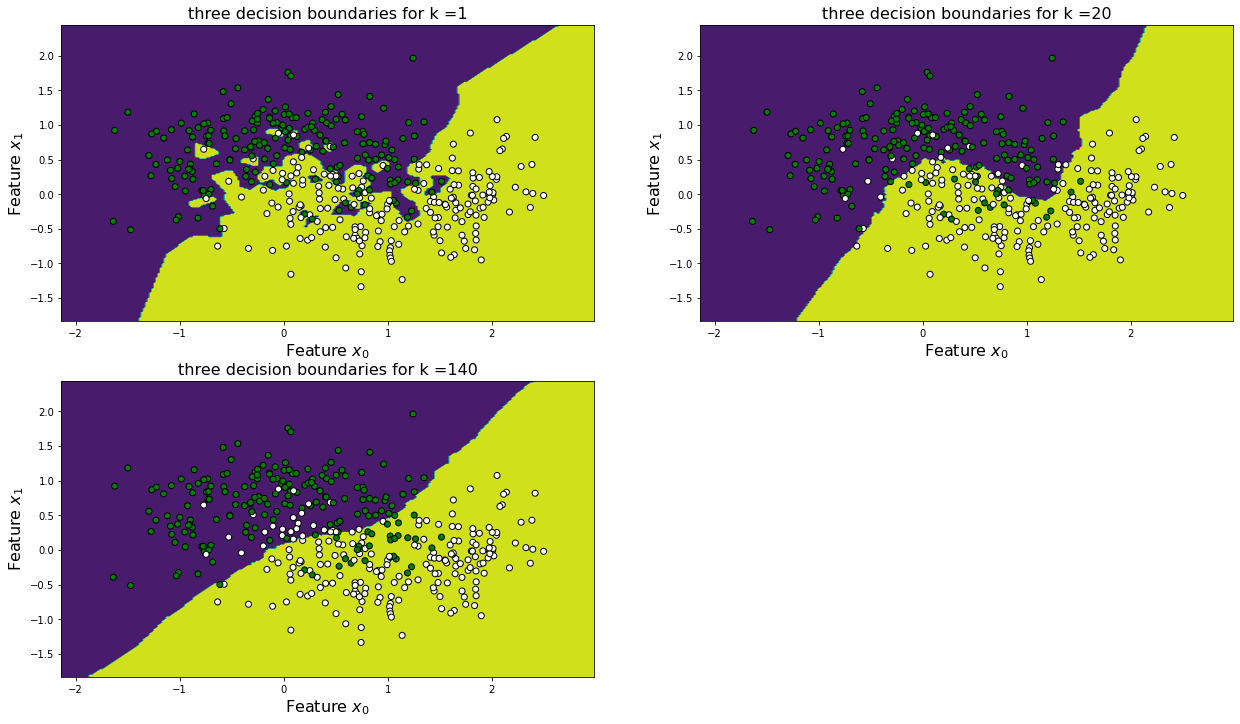

In [6]:
from sklearn.model_selection import train_test_split
perc = 400/1000
X_train,X_test, y_train,  y_test = train_test_split(X,y,train_size = perc )

from sklearn.neighbors import KNeighborsClassifier

def knn(X,Y,arr_n,arr_title = [''],step =.02):

    nbr_ = len(arr_n)
    plt.figure(figsize = (7*nbr_, 4* nbr_))
    for i in range(nbr_):
        n_neighbors = arr_n[i]
        try:
            title = arr_title[i]
        except:
            pass
        knn = KNeighborsClassifier(n_neighbors= n_neighbors)
        knn.fit(X,Y)
        min_feat0 , min_feat1 = min(X[:,0]) -.5 , min(X[:,1]) -.5 
        max_feat0 , max_feat1 = max(X[:,0]) +.5 , max(X[:,1]) +.5 
        x , y = np.arange(min_feat0,max_feat0,step), np.arange(min_feat1,max_feat1,step)
        xx , yy = np.meshgrid(x,y)
        z = np.c_[xx.ravel(),yy.ravel()]
        zz = knn.predict(z)
        if nbr_ !=1:
            plt.subplot(int(nbr_/2)+1,2,i+1)
        plt.contourf(xx,yy,zz.reshape(xx.shape))
        plt.scatter(X[:,0],X[:,1],c = Y,cmap = 'ocean',edgecolor = 'k')
        plt.xlabel('Feature $x_0$', size = 16)
        plt.ylabel('Feature $x_1$', size = 16)
        plt.title(title,size = 16)
        
    plt.show()
        
arr_title = ['three decision boundaries for k =1','three decision boundaries for k =20','three decision boundaries for k =140']        
knn(X_train,y_train,[1,20,140],arr_title)

# Next, we will split the dataset from in two equal sized test and training datasets and train a kNN classifier on different K and plot the classification error

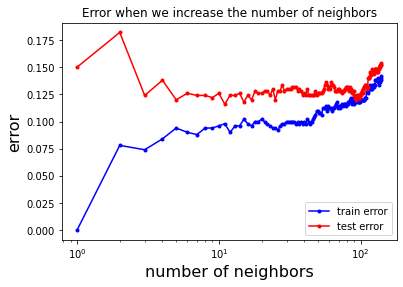

In [7]:

def classification_err(X,y,split = .5,low=1,high=141, title ='' ):
    X_train,X_test, y_train,  y_test = train_test_split(X,y,train_size = split )
    error_train = []
    error_test = []
    for i in range(low,high):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        error_train.append(1- knn.score(X_train,y_train))
        error_test.append(1- knn.score(X_test,y_test))
    plt.semilogx(range(low,high),error_train, '.-b',label = 'train error')
    plt.semilogx(range(low,high),error_test, '.-r',label = 'test error')
    plt.xlabel('number of neighbors',size = 16)
    plt.ylabel('error',size = 16)
    plt.title(title)
    plt.legend(loc = 'lower right')
    plt.show()

classification_err(X,y, title = 'Error when we increase the number of neighbors' )